In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import plotly.figure_factory as ff

In [2]:
data_m = pd.read_csv('xab.csv')
data_m.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,9c620428487cada88130ab08e2ed063c4824852d,9/12/19 12:45,9/12/19 12:45,24,0.0,1.703184e+10,1.703184e+10,28.0,28.0,10.0,...,0.00,10.00,True,1,41.870415,-87.675086,POINT (-87.6750856208 41.8704150003),41.870415,-87.675086,POINT (-87.6750856208 41.8704150003)
1,9c62bd8cad97bd27430e2e3ffc07628a7fa00d5d,8/18/19 19:00,8/18/19 19:00,242,0.0,1.703108e+10,1.703108e+10,8.0,8.0,2.5,...,2.55,5.05,False,1,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
2,9c62fa73e82e32a54c9f2aca47e11f370b9bb80c,7/8/19 17:15,7/8/19 17:15,6,0.0,NaN,NaN,16.0,16.0,15.0,...,0.00,17.00,True,1,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253)
3,9c69c7bba2eb3f2846988fed0916b1dc245b0b14,9/27/19 6:30,9/27/19 6:30,10,0.0,NaN,NaN,2.0,2.0,2.5,...,2.55,5.05,False,1,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027)
4,9c7214acfd1aded46abeebe484939233d618c02a,9/28/19 22:45,9/28/19 22:45,21,0.0,1.703107e+10,1.703107e+10,7.0,7.0,2.5,...,2.55,5.05,False,1,41.929078,-87.646293,POINT (-87.6462934762 41.9290776551),41.929078,-87.646293,POINT (-87.6462934762 41.9290776551)


In [3]:
x_train, x_val, y_train, y_val = train_test_split(data_m[["Trip Seconds","Trip Miles","Additional Charges"]],data_m["Trip Total"],train_size = 0.75, test_size = 0.25, random_state = 0)

In [4]:
scaler = StandardScaler()
x_train.fillna(x_train.mean(), inplace=True)
x_val.fillna(x_val.mean(), inplace=True)
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_val)

In [5]:
#Checking first for a model with 1 predictors.
pred_variable = ['Trip Seconds']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[0]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[0]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[0]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.6303826877883139, 0.6381225798264011]


In [6]:
pred_variable = ['Trip Miles']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[1]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[1]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[1]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.791631450720499, 0.7801969515610844]


In [7]:
pred_variable = ['Additional Charges']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[1]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[2]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[2]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.3191401410618644, 0.32731097885973587]


In [8]:
pred_variable = ['Trip Seconds', 'Trip Miles']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[0,1]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[0,1]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[0,1]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.8052335202761105, 0.7963859365267957]


In [9]:
pred_variable = ['Trip Seconds', 'Additional Charges']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[0,2]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[0,2]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[0,2]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.762346024707321, 0.7643372401543252]


In [10]:
pred_variable = ['Trip Miles', 'Additional Charges']
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[1,2]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[1,2]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[1,2]], y = y_val) # R squared (Validation)

print([score_train, score_val])

[0.8388472989736899, 0.8309795982200868]


In [11]:
model = linear_model.LinearRegression().fit(X = x_train_scaled, y = y_train)

score_train = model.score(X = x_train_scaled, y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled, y = y_val) # R squared (validation)
print([score_train, score_val])

[0.8568569676498858, 0.8507027156783711]


In [12]:
data_m['Trip Start Time']=pd.to_datetime(data_m['Trip Start Timestamp'])
data_m['Trip End Time']=pd.to_datetime(data_m['Trip End Timestamp'])
data = data_m.loc[:,['Fare']]
data = data.set_index(data_m['Trip Start Time'])
data['Fare'] = pd.to_numeric(data['Fare'], downcast = 'float', errors = 'coerce')
data.head()

,Fare
Trip Start Time,
2019-09-12 12:45:00,10.0
2019-08-18 19:00:00,2.5
2019-07-08 17:15:00,15.0
2019-09-27 06:30:00,2.5
2019-09-28 22:45:00,2.5


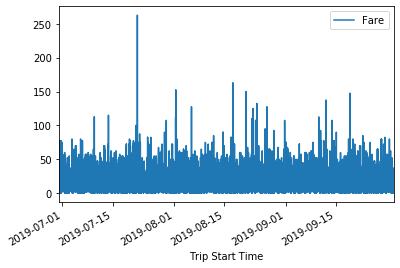

In [13]:
data.plot()

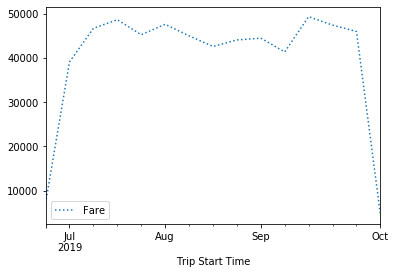

In [14]:
weekly = data.resample('W').sum()
pd.plotting.register_matplotlib_converters()
weekly.plot(style = [':','--','-'])

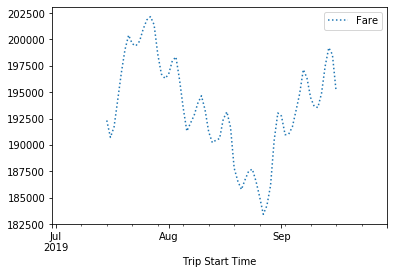

In [15]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style = [':','--','-'])

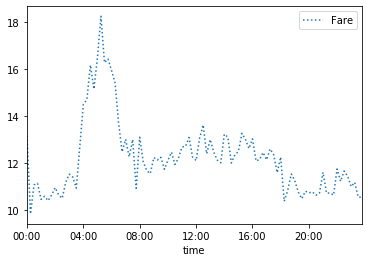

In [16]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [':','--','-'])

In [17]:
df = data_m.loc[:,['Trip Start Time', 'Fare']]
df['Fare'] = pd.to_numeric(df['Fare'], errors = 'coerce')
df = df.groupby(['Trip Start Time']).sum().reset_index()
df.head()

,Trip Start Time,Fare
0,2019-06-30 00:00:00,25.0
1,2019-06-30 00:15:00,102.5
2,2019-06-30 00:30:00,112.5
3,2019-06-30 00:45:00,35.0
4,2019-06-30 01:00:00,167.5


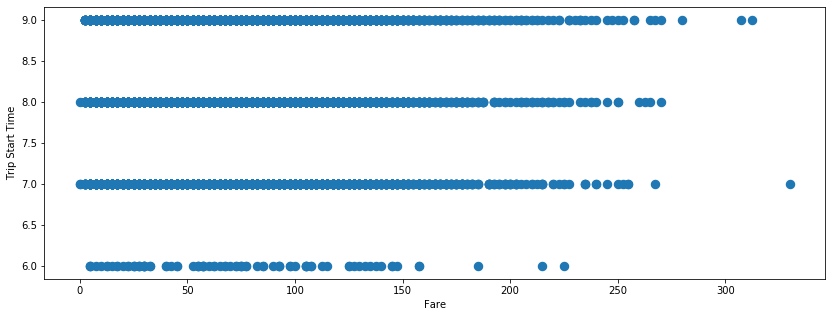

In [18]:
mon = data_m['Trip Start Time']
temp = pd.DatetimeIndex(mon)
month = pd.Series(temp.month)
to_be_plotted = df.drop(['Trip Start Time'], axis = 1)
to_be_plotted = to_be_plotted.join(month)
to_be_plotted.plot.scatter(x = 'Fare', y = 'Trip Start Time', figsize = (14,5), linewidth = 5, fontsize = 10)
plt.show()

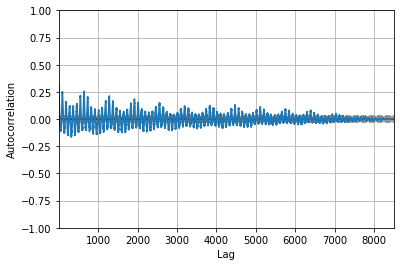

In [19]:
pd.plotting.autocorrelation_plot(df['Fare'])
plt.show()

In [20]:
df2 = data_m
df2.reset_index(inplace=True)
df2 = df2.rename(columns={'Trip Start Timestamp':'ds','Trip Total':'y'})
df2.head()

,index,Trip ID,ds,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Time,Trip End Time
0,0,9c620428487cada88130ab08e2ed063c4824852d,9/12/19 12:45,9/12/19 12:45,24,0.0,1.703184e+10,1.703184e+10,28.0,28.0,...,True,1,41.870415,-87.675086,POINT (-87.6750856208 41.8704150003),41.870415,-87.675086,POINT (-87.6750856208 41.8704150003),2019-09-12 12:45:00,2019-09-12 12:45:00
1,1,9c62bd8cad97bd27430e2e3ffc07628a7fa00d5d,8/18/19 19:00,8/18/19 19:00,242,0.0,1.703108e+10,1.703108e+10,8.0,8.0,...,False,1,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),2019-08-18 19:00:00,2019-08-18 19:00:00
2,2,9c62fa73e82e32a54c9f2aca47e11f370b9bb80c,7/8/19 17:15,7/8/19 17:15,6,0.0,NaN,NaN,16.0,16.0,...,True,1,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),2019-07-08 17:15:00,2019-07-08 17:15:00
3,3,9c69c7bba2eb3f2846988fed0916b1dc245b0b14,9/27/19 6:30,9/27/19 6:30,10,0.0,NaN,NaN,2.0,2.0,...,False,1,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027),2019-09-27 06:30:00,2019-09-27 06:30:00
4,4,9c7214acfd1aded46abeebe484939233d618c02a,9/28/19 22:45,9/28/19 22:45,21,0.0,1.703107e+10,1.703107e+10,7.0,7.0,...,False,1,41.929078,-87.646293,POINT (-87.6462934762 41.9290776551),41.929078,-87.646293,POINT (-87.6462934762 41.9290776551),2019-09-28 22:45:00,2019-09-28 22:45:00


In [21]:
df2_prophet = fbprophet.Prophet(changepoint_prior_scale=0.10)
df2_prophet.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [22]:
df2_forecast = df2_prophet.make_future_dataframe(periods= 30*3, freq = 'H')
df2_forecast = df2_prophet.predict(df2_forecast)

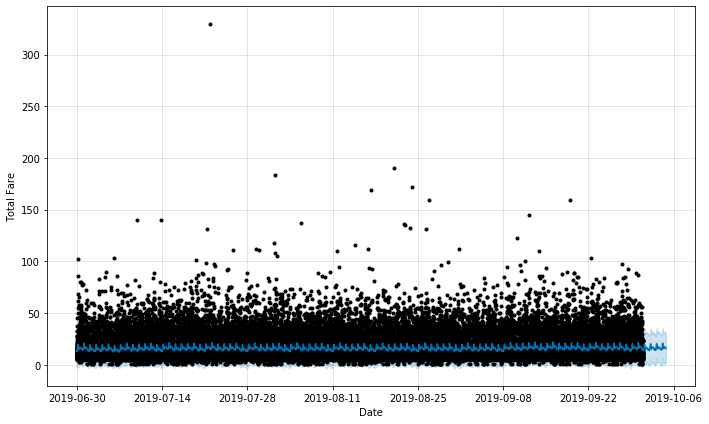

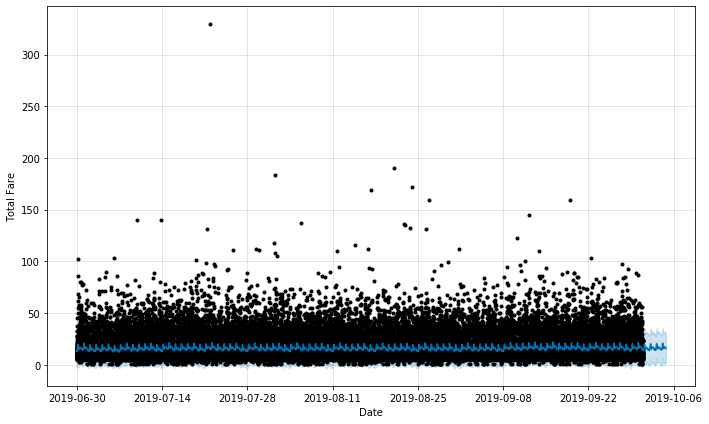

In [23]:
df2_prophet.plot(df2_forecast, xlabel = 'Date', ylabel = 'Total Fare') 

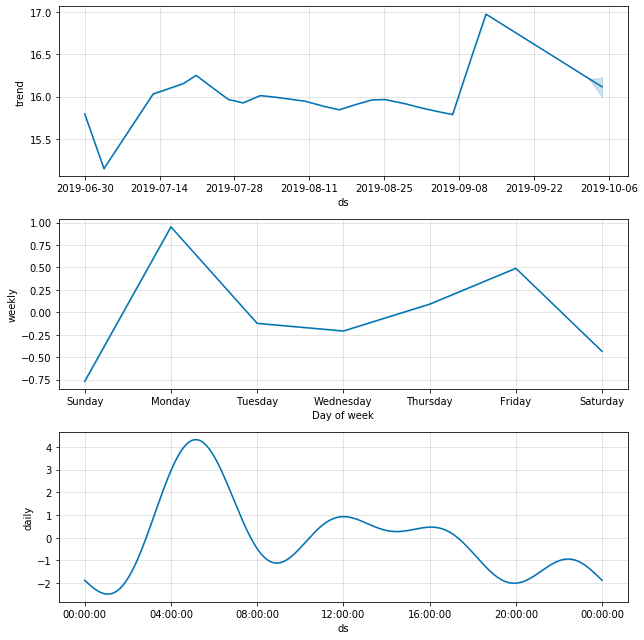

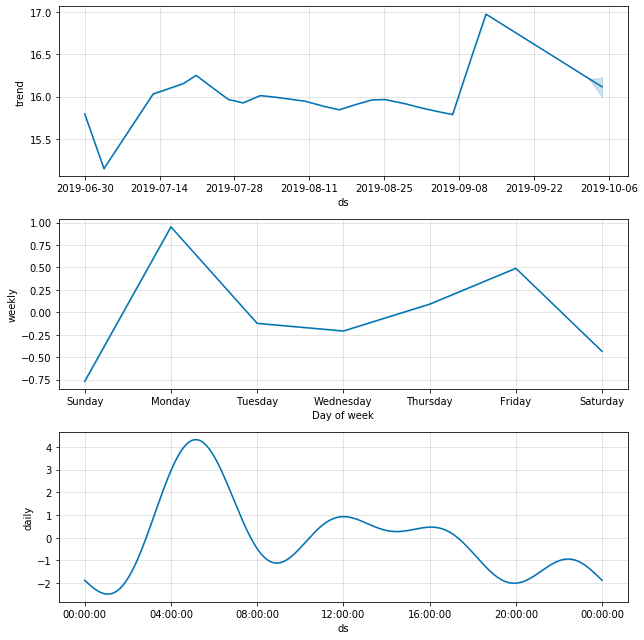

In [24]:
df2_prophet.plot_components(df2_forecast)

[0.21679215799007667, 0.556602484739871]


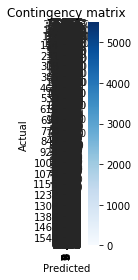

In [25]:
# K-Means with 5 clusters, 10 iterations
# "Trip Seconds","Trip Miles","Additional Charges"
# Variables used: 'Trip Seconds'[0] , 'Trip Miles'[1], 'Additional Charges'[2] 

# pick certain variables from x_train_scaled
X = []
for i in x_train_scaled:
    X.append([i[1]])


# cluster observations
clustering = KMeans(n_clusters = 10, init='random', max_iter = 25, random_state=0).fit(X, y_train)
clusters = clustering.labels_

# build and display contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(y_train, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# determine adjusted rand index and silhouette coefficient
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters)
print([adjusted_rand_index, silhouette_coefficient])

In [38]:
data_m['Trip Date'] = pd.to_datetime(data_m['Trip Start Timestamp'])
data_m['dy'] = data_m['Trip Date'].dt.dayofyear
data_m['Hours'] = data_m['Trip Date'].dt.time
data = data_m.loc[:,['Hours','dy','Trip Total']]
temp = data_m.loc[:,['dy','Trip Total']]
data['Trip Total'] = pd.to_numeric(data['Trip Total'],errors = 'coerce')
temp = temp.set_index(data['Hours'])
temp = data.pivot_table(index=['Hours'],columns = ['dy'], values = ['Trip Total'], fill_value = 0)
temp.head()

Trip Total                                                  \
dy              181    182        183     184        185        186   
Hours                                                                 
00:00:00  10.883333  18.14  19.233333  27.575  10.810000  26.830000   
00:15:00  14.211111  13.80   9.550000  11.850  12.975000  10.327778   
00:30:00  13.855556  22.15  16.050000  13.660   9.488889  10.110000   
00:45:00   7.958333  20.42   0.000000   8.800  15.162500  12.520000   
01:00:00  12.984375   6.94   0.000000  10.050  11.050000  16.583333   

                                                  ...                        \
dy              187        188      189      190  ...        264        265   
Hours                                             ...                         
00:00:00  14.540000  18.771429  14.4875   8.8000  ...  14.425000  15.432000   
00:15:00  11.328571   8.958333  13.8000  16.3000  ...   9.675000  13.346250   
00:30:00  10.875000   8.981250  14.7300  10.5500  ...  22.150000  10.550000   
00:45:00   8.216667  10.933333  15.5500  21.1625  ...  18.158571   9.728571   
01:00:00   9.425000  13.133333   8.2200   0.0000  ...  10.050000  10.037500   

                                                                            \
dy              266        267        268        269        270        271   
Hours                                                                        
00:00:00  13.110000  29.693333  11.300000   7.550000  13.153846  24.445000   
00:15:00  12.716667   5.050000  15.030000  15.050000  10.458333  18.021429   
00:30:00  10.383333  17.016667  18.383333  20.050000  33.300000  16.835714   
00:45:00  17.612500   7.550000   0.000000  17.783333  13.687500   8.458333   
01:00:00  35.000000   0.000000  21.150000  10.050000  18.383333   9.642000   

                                
dy              272        273  
Hours                           
00:00:00  15.670833  31.083333  
00:15:00  12.312500  11.300000  
00:30:00  16.231250  40.300000  
00:45:00   9.362500   9.425000  
01:00:00  12.750000  17.550000  

[5 rows x 93 columns]

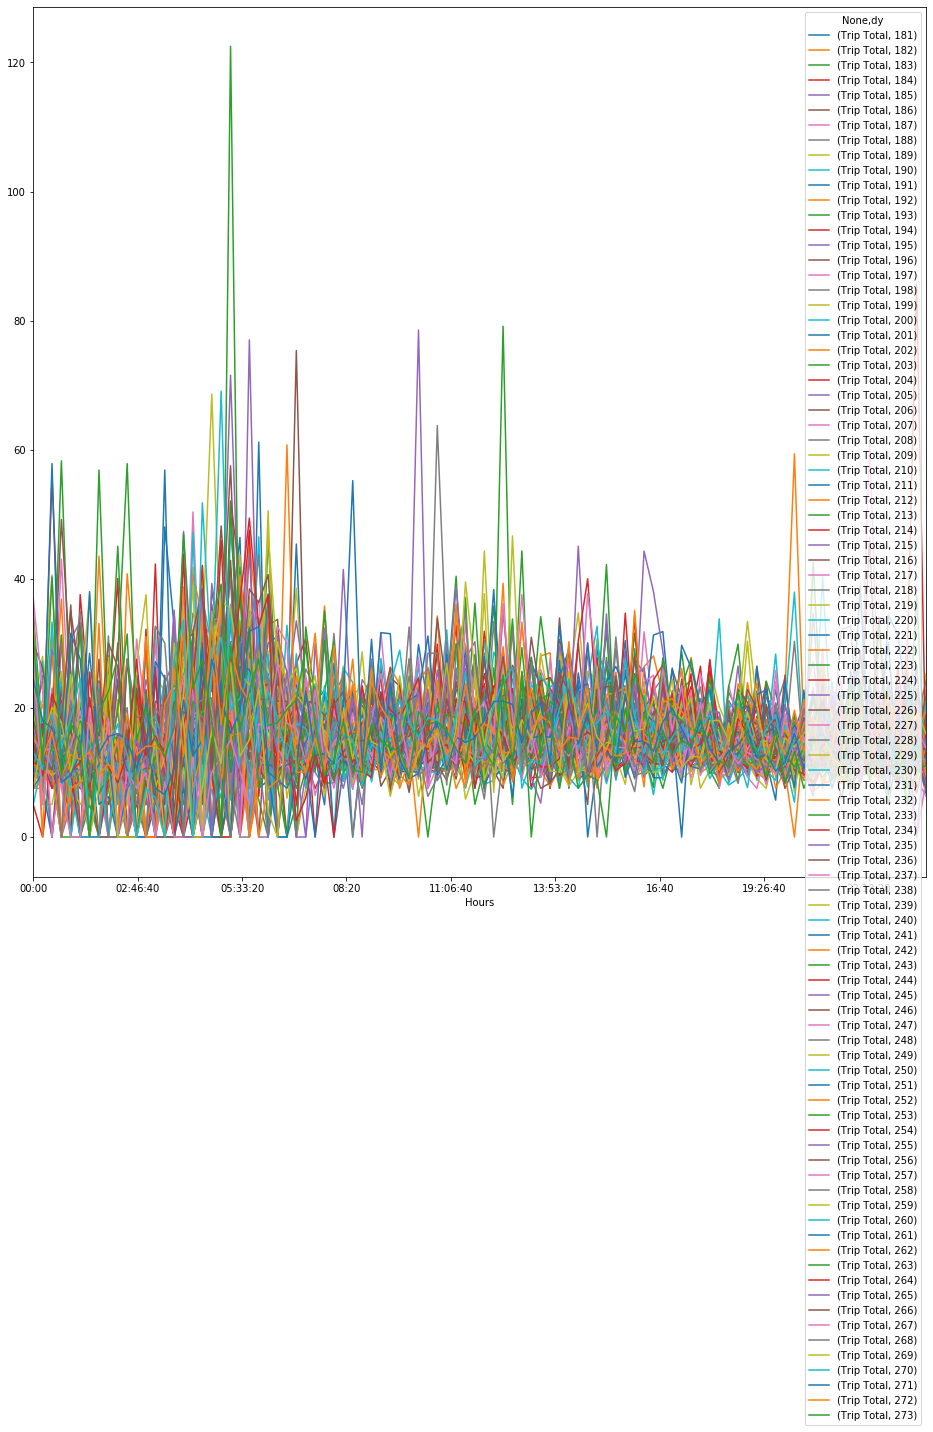

In [40]:
temp.plot(figsize=(16,16))

In [43]:
z = linkage(temp.iloc[:,:], 'ward')

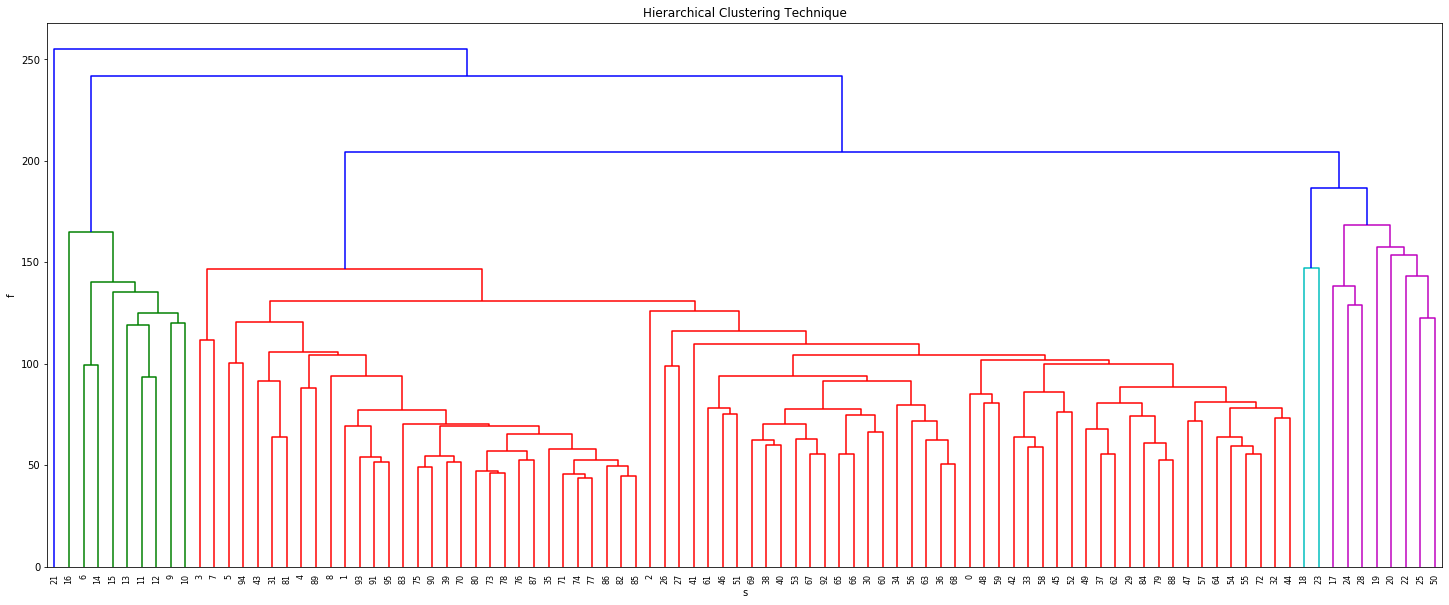

In [44]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Technique')
plt.xlabel('s')
plt.ylabel('f')
dendrogram(
           z,
           leaf_rotation = 90,
           leaf_font_size = 8,
)
plt.show()